In [3]:
import pandas as pd
path = r'C:\Users\HP\Downloads\titanic-passengers.csv'
data = pd.read_csv(path, sep= ';')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S


In [4]:
#preprocessing our data:
def preprocessing_data(df):
    df['Age'].fillna(df['Age'].mean(), inplace= True)
    df.replace({'Sex':{'male': 1, 'female': 0}}, inplace = True)
    df.replace({'Survived': {'Yes': 1, 'No' : 0}}, inplace = True)
    df['FamilySize']= df["Parch"] + df["SibSp"]
    data['Title']= data['Name'].str.extract(pat =' ([A-Za-z]+)\.') 
    return df
data_1 = preprocessing_data(data)
data_1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.000000,0,0,248740,13.0000,NaN,S,0,Mr
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.000000,0,0,348123,7.6500,F G73,S,0,Mr
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.000000,0,0,350050,7.8542,NaN,S,0,Mr
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.000000,0,4,349909,21.0750,NaN,S,4,Mrs
4,672,0,1,"Davidson, Mr. Thornton",1,31.000000,1,0,F.C. 12750,52.0000,B71,S,1,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.000000,1,0,237736,30.0708,NaN,C,1,Mrs
887,61,0,3,"Sirayanian, Mr. Orsen",1,22.000000,0,0,2669,7.2292,NaN,C,0,Mr
888,535,0,3,"Cacic, Miss. Marija",0,30.000000,0,0,315084,8.6625,NaN,S,0,Miss
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",1,29.699118,0,0,349215,7.8958,NaN,S,0,Mr


In [5]:
Title_Dictionary = {"Capt":       "0",
                    "Col":        "0",
                    "Major":      "0",
                    "Dr":         "0",
                    "Rev":        "0",
                    "Jonkheer":   "1",
                    "Don":        "1",
                    "Sir" :       "1",
                    "Lady" :      "1",
                    "the Countess": "1",
                    "Countess": "1",
                    "Dona":       "1",
                    "Mme":        "2",
                    "Mlle":       "2",
                    "Miss" :      "2",
                    "Ms":         "3",
                    "Mr" :        "3",
                    "Mrs" :       "3",
                    "Master" :    "4",
                    "Officer":    "5",
                    "Royalty": "6"}
data.replace(Title_Dictionary, inplace = True)

In [29]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
#features extracting:
x = data_1[['Pclass', 'Sex', 'Age', 'Fare', 'FamilySize', 'Title']]
y = data_1['Survived']

#splitting data:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size= 0.2,  random_state=10)
#applying tree algorithm:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.7877094972067039


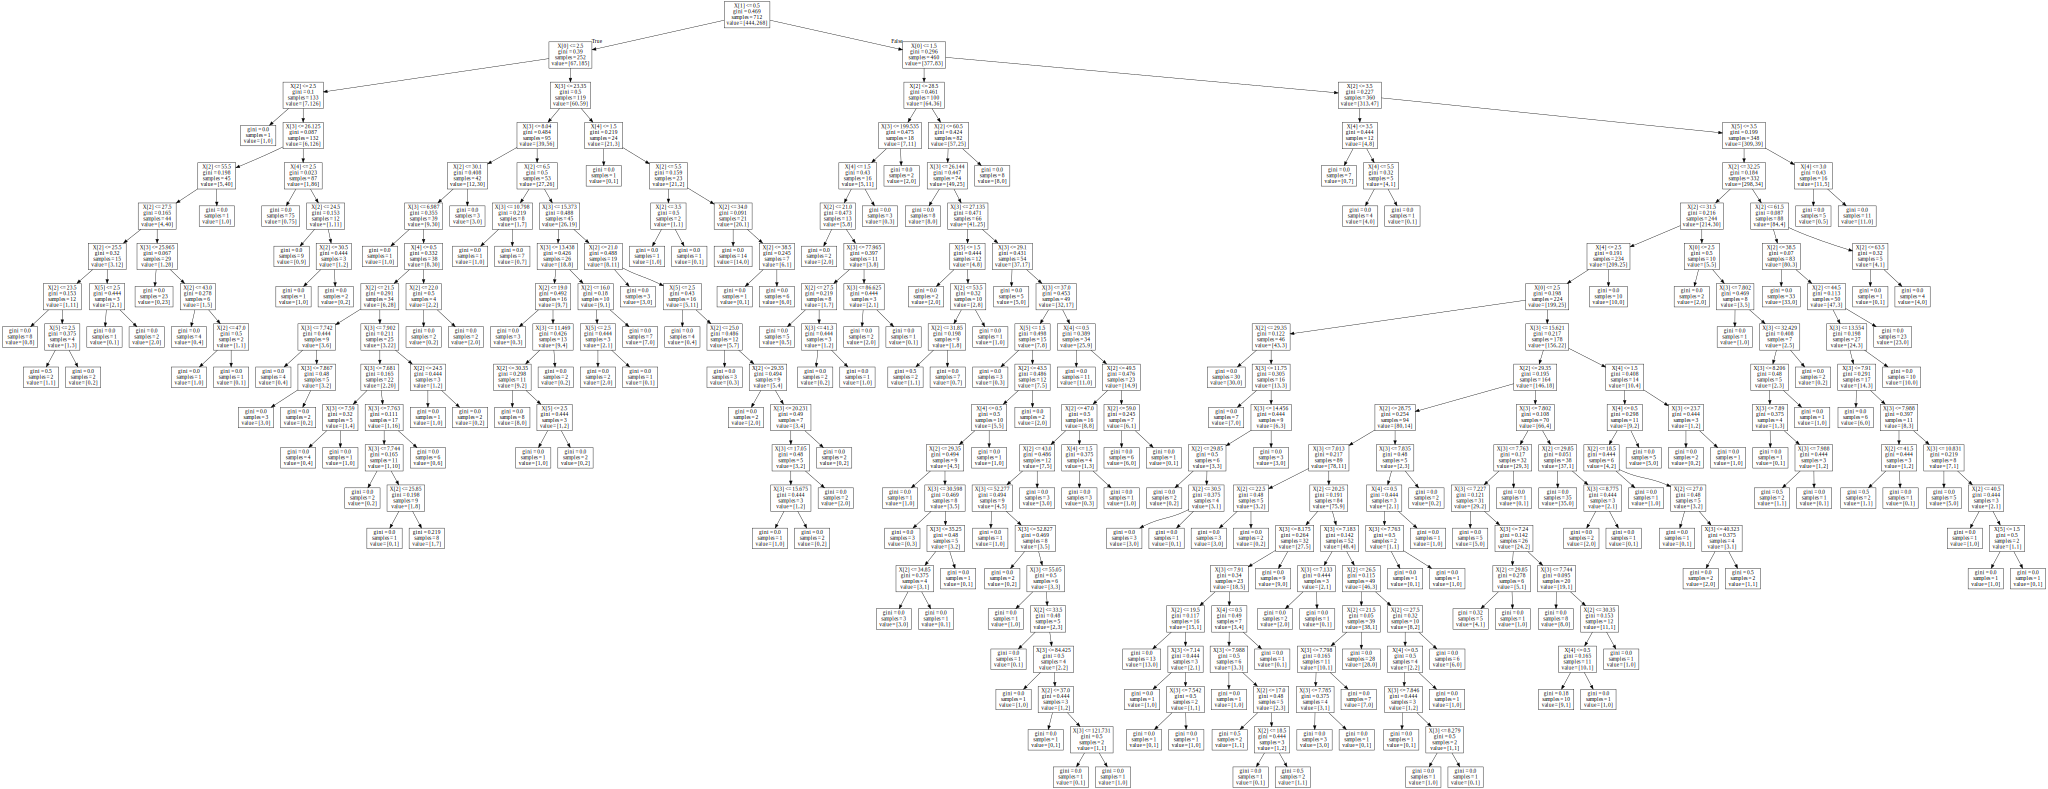

In [30]:
#Decision Tree Vizualisation:
import graphviz
dot_data_1 = tree.export_graphviz(model,out_file = None)
graph = graphviz.Source(dot_data_1)
graph.render('data_1')
graph


score:0.8268156424581006


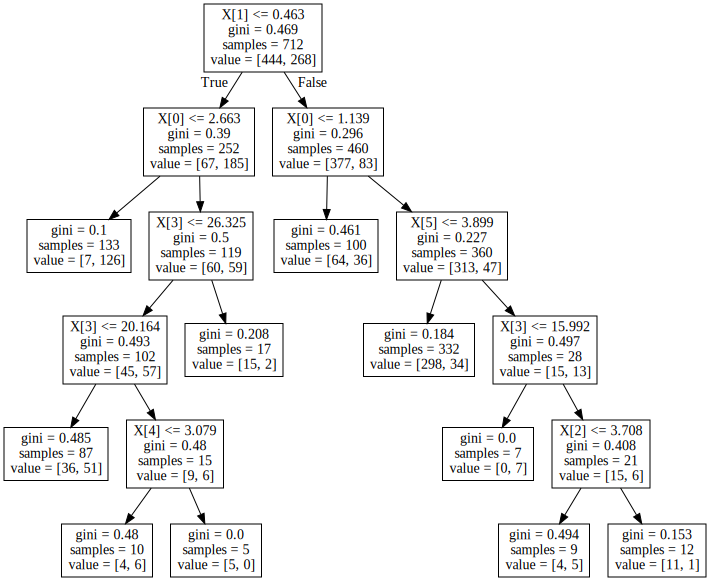

In [70]:
#Prning the tree:
dtree.fit(x_train, y_train)
dot_dtree = tree.export_graphviz(dtree,out_file = None)
graph = graphviz.Source(dot_dtree)
graph.render('dtree')
y_pred_d = dtree.predict(x_test)

print("score:{}".format(accuracy_score(y_test, y_pred_d)))
graph

In [32]:
#Reading the result manually:
#we get higher accuracy with pruning the tree by changing parameters.
print(x.keys())
#let'sstart with the first node, the question asked is whether the sex is male or female
#the gini value is 0.46 which describe the purity of thenode,then we have the sample number and the specific value 
#444 didn't survive and 268 survived.
#We can make a prediction from the tree: for example let's use some random line: 216
print(x.loc[216])
#the sex is male so we go from node 0 to 1 then we ask if pclass is less than 1.1 which is false
# so we go to node 6 then we askif tittle is less than 3.8 which is true so we go to node 7
#value are 298 survived, 34 didn't survive so the prediction will be 'survived'.

Index(['Pclass', 'Sex', 'Age', 'Fare', 'FamilySize', 'Title'], dtype='object')
Pclass             3
Sex                1
Age               16
Fare          34.375
FamilySize         4
Title              3
Name: 216, dtype: object


In [35]:
#Random forest:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

clf = RandomForestClassifier()
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print('Accuracy: ', metrics.accuracy_score(y_pred,y_test))
# the random forest model accuracy is better than the tree model because the random forest makes the tree
# robust to overffiting

Accuracy:  0.8379888268156425


In [72]:
#now let's change the estimators number which refers to the number of trees in the forest:
rf = RandomForestClassifier(n_estimators=50)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
print('Accuracy: ', metrics.accuracy_score(y_pred,y_test))
# the accuracy is better than the standard random forest which use 100 estimators as default.

Accuracy:  0.8491620111731844
